# Introducción al Módulo `dsp-utils` para Procesamiento Digital de Señales

En este notebook aprenderemos a utilizar el módulo `dsp-utils`, una biblioteca especialmente diseñada para este curso de Procesamiento Digital de Señales (DSP) en Python. Este módulo incluye funciones para la generación, manipulación y visualización de señales, facilitando la implementación de técnicas y algoritmos de procesamiento de señales.

## Objetivos

- Familiarizarnos con las funciones de `dsp-utils` para la generación de señales.
- Aprender a visualizar señales utilizando las herramientas de `dsp-utils`.
- Aplicar las funciones del módulo en ejemplos prácticos.

## 1. Instalación del Módulo `dsp-utils`

Asegúrate de tener instalado el módulo `dsp-utils`. Si aún no lo has hecho, puedes instalarlo ejecutando el siguiente comando:

```python
!pip install dsp-utils
```

## 2. Importación de `dsp-utils`

Importaremos el módulo `dsp-utils` y sus funciones principales. Además, importaremos `NumPy` y `Matplotlib` para complementar las operaciones.

In [3]:
from dsp_utils import SignalGenerator
from dsp_utils import Visualizer
import numpy as np

## 3. Generación de Señales Básicas con `dsp-utils`

El módulo `dsp-utils` incluye una clase `SignalGenerator` que facilita la creación de diferentes tipos de señales. A continuación, exploraremos algunas de las señales básicas que podemos generar con esta clase.

### Señal Sinusoidal

Vamos a generar una señal sinusoidal utilizando `SignalGenerator`.

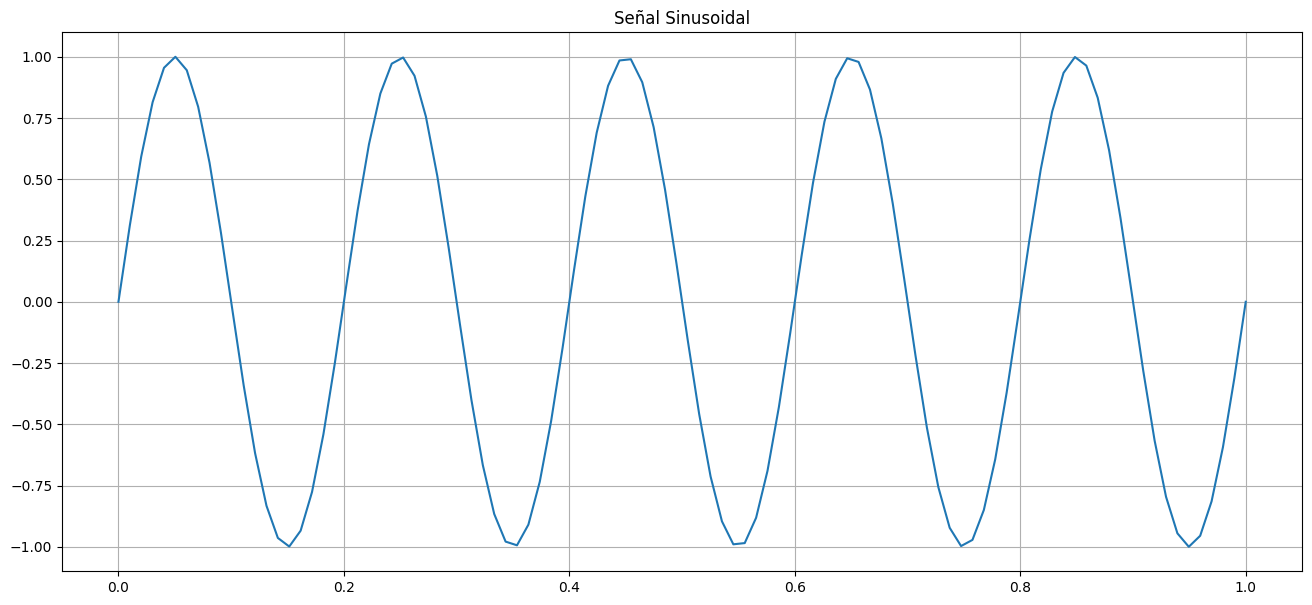

In [5]:
# Inicialización del generador de señales
generador = SignalGenerator(frequency=5, amplitude=1, duration=1, sampling_rate=100)

vis = Visualizer(figsize=(16, 7), dpi=100)

# Generación de la señal sinusoidal
senal_seno = generador.sine_wave

# Visualización usando plot_signal de dsp-utils
vis.plot_signal(senal_seno, time=generador.time, title="Señal Sinusoidal")

### Señal Cuadrada

El generador de señales también permite crear señales cuadradas con facilidad.

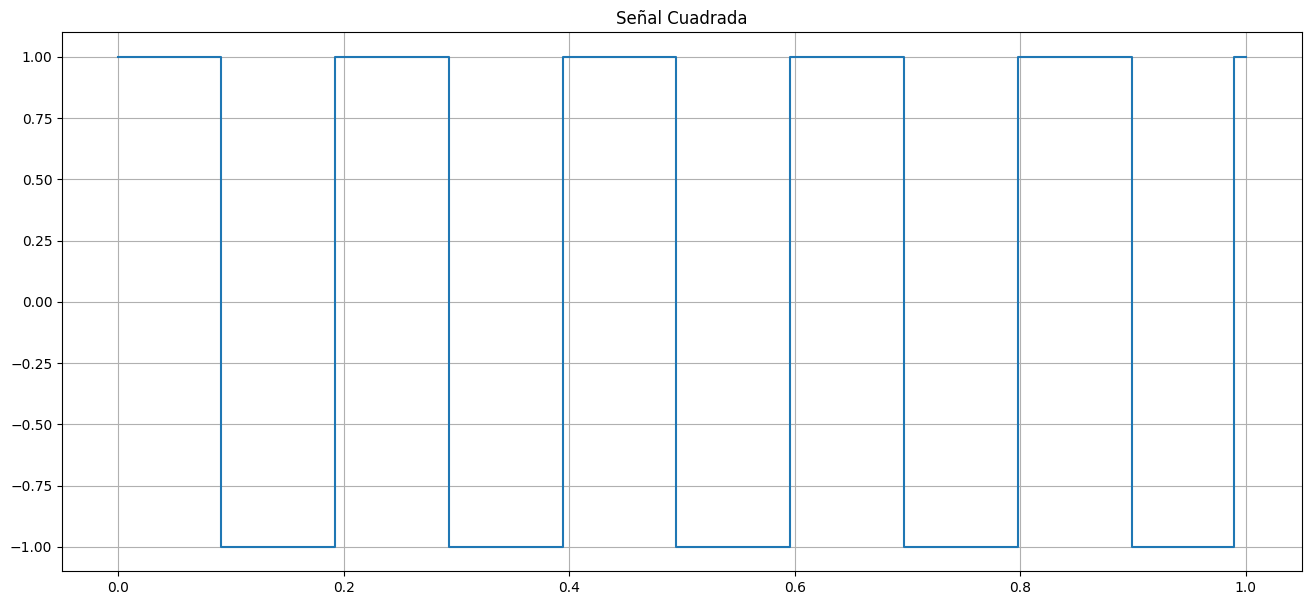

In [3]:
# Generación de la señal cuadrada
senal_cuadrada = generador.square_wave

# Visualización
vis.plot_signal(senal_cuadrada, time=generador.time, title="Señal Cuadrada", fn='step')

### Señal Triangular

La señal triangular también puede generarse directamente desde el generador.

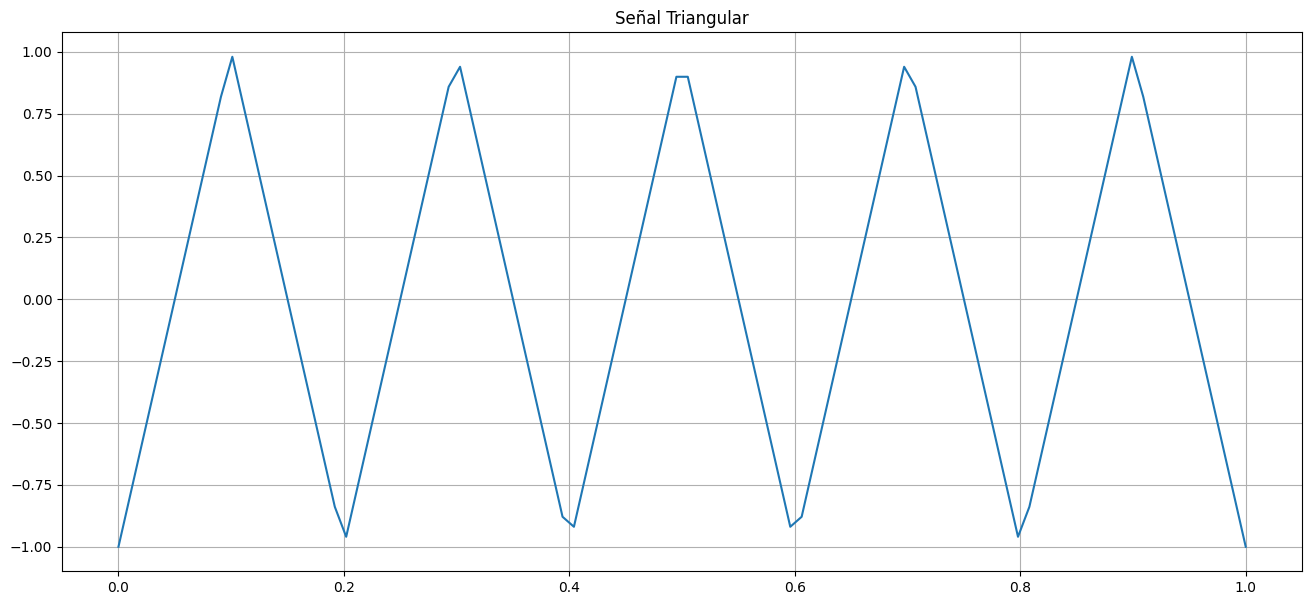

In [4]:
# Generación de la señal triangular
senal_triangular = generador.triangle_wave

# Visualización
vis.plot_signal(senal_triangular, time=generador.time, title="Señal Triangular")

### Señal de Onda Sierra

La señal de onda sierra es otra forma de onda periódica que se utiliza en aplicaciones de análisis de Fourier y generación de armónicos.


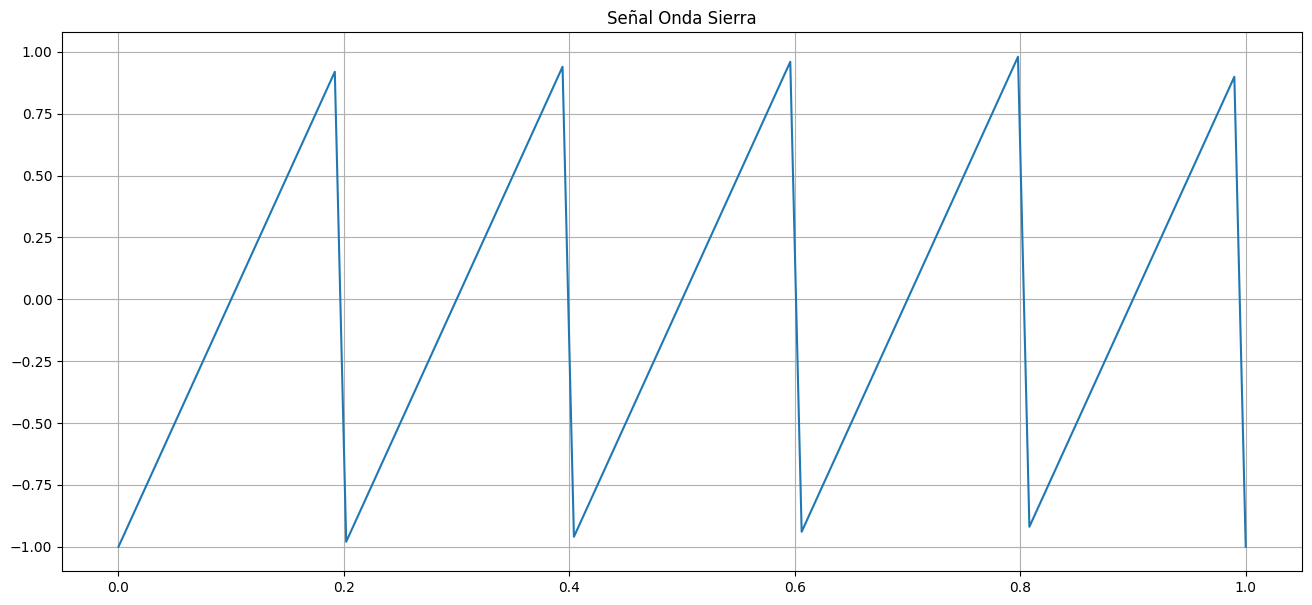

In [5]:
# Generación de la señal de onda sierra
senal_triangular = generador.sawtooth_wave

# Visualización
vis.plot_signal(senal_triangular, time=generador.time, title="Señal Onda Sierra")

### Señal de Ruido Gaussiano

El módulo también permite la generación de ruido gaussiano, útil para simular interferencias o variaciones en una señal.

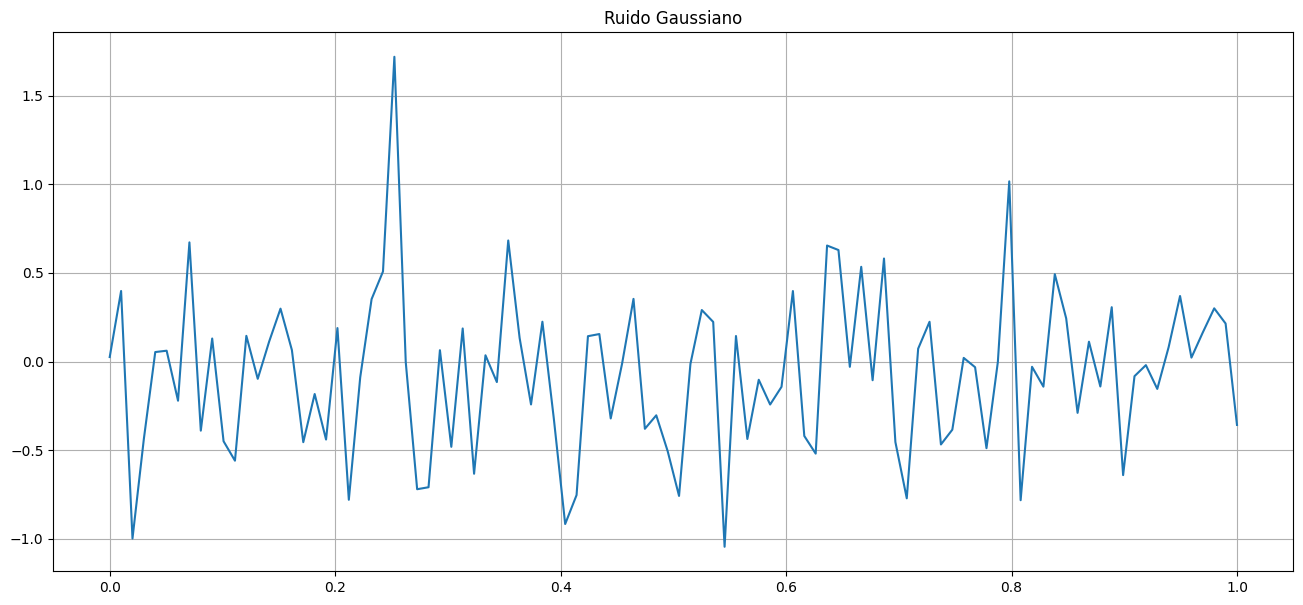

In [6]:
# Generación de ruido gaussiano
ruido_gaussiano = generador.gaussian_noise(mean=0, std_dev=0.5)

# Visualización
vis.plot_signal(ruido_gaussiano, time=generador.time, title="Ruido Gaussiano")

## 4. Generación de Múltiples Señales con ```dsp-utils```

### Configuración de Parámetros para Múltiples Señales

Al pasar vectores como `frequency` y `amplitude`, cada elemento de estos vectores será tratado como una configuración para una señal individual. Esto permite generar múltiples señales de forma simultánea.

Definimos múltiples frecuencias y amplitudes:

- `frequency = [5, 10, 15]`: Tres frecuencias diferentes en Hz.
- `amplitude = [1, 0.5, 2]`: Tres amplitudes diferentes.

In [7]:
# Configuración de frecuencias y amplitudes múltiples
frequencies = [5, 10, 15]       # Frecuencias en Hz
amplitudes = [1, 0.5, 2]        # Amplitudes correspondientes
duration = 1                    # Duración de la señal en segundos
sampling_rate = 500             # Frecuencia de muestreo en Hz

# Creación de un generador con múltiples frecuencias y amplitudes
generador = SignalGenerator(frequency=frequencies, amplitude=amplitudes, duration=duration, sampling_rate=sampling_rate)

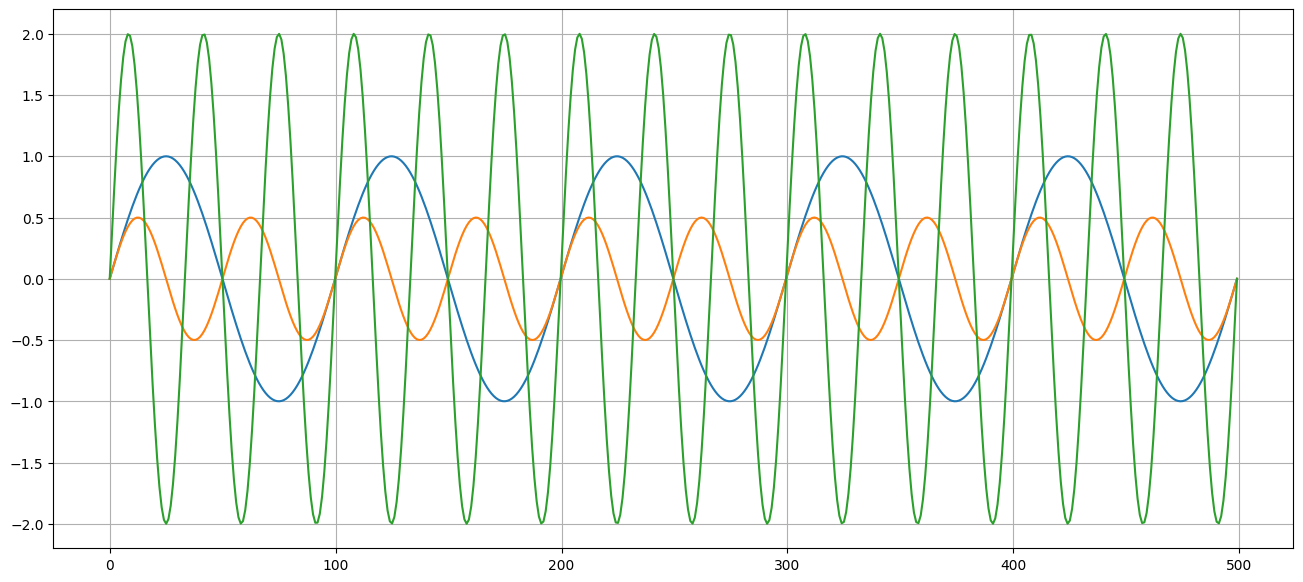

In [8]:
vis.plot_signal(generador.sine_wave)

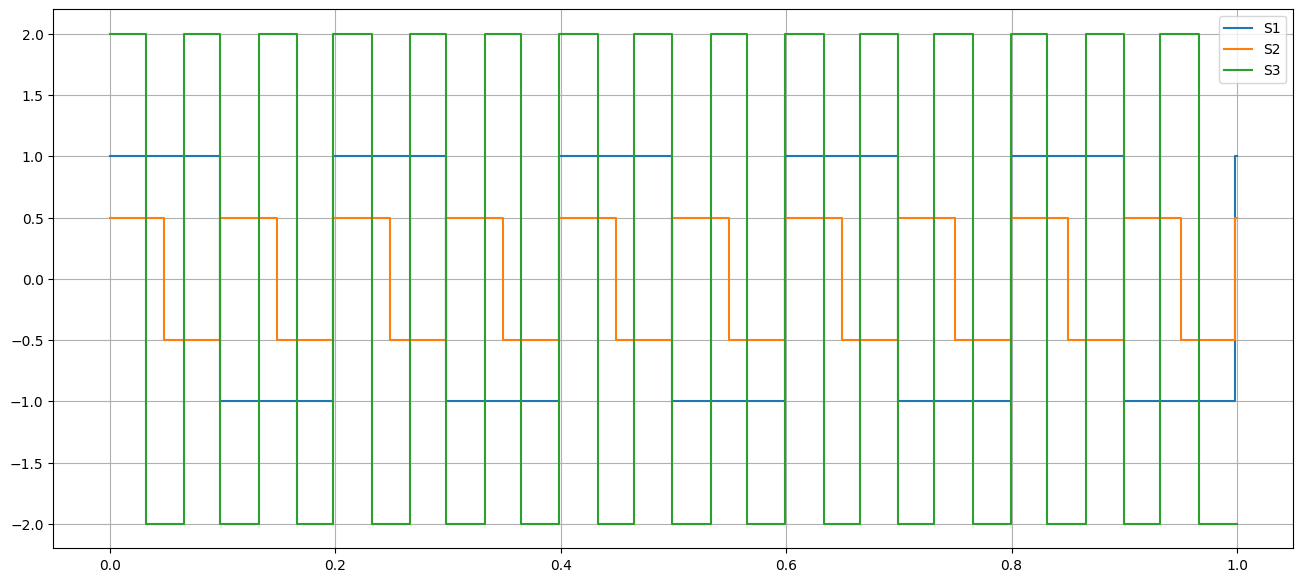

In [9]:
vis.plot_signal(generador.square_wave, time=generador.time, labels=['S1', 'S2', 'S3', ], fn='step')

## 5. Manipulación y Operaciones con Señales

Además de la generación de señales, `dsp-utils` incluye funciones para manipular señales, como la suma y multiplicación.

### Suma de Señales

A continuación, sumaremos una señal sinusoidal y una señal cuadrada.

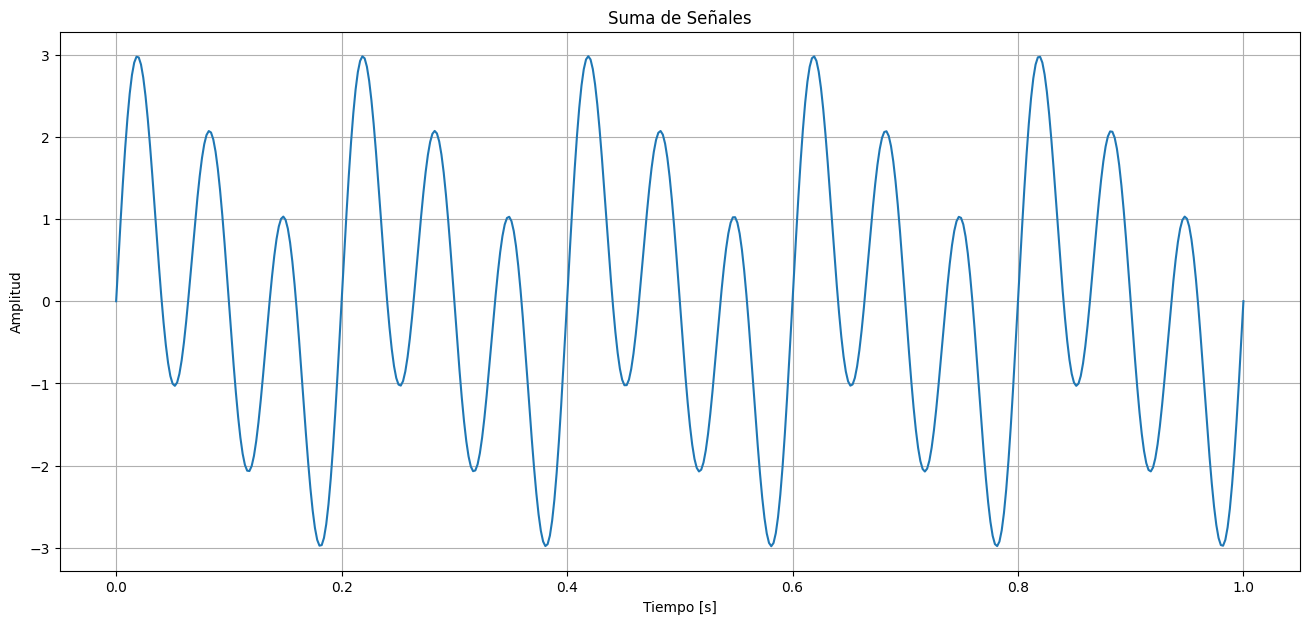

In [10]:
import numpy as np

# Suma de las señales
senal_sumada = np.sum(generador.sine_wave, axis=0)

vis.plot_signal(senal_sumada, time=generador.time, title="Suma de Señales", xlabel='Tiempo [s]', ylabel="Amplitud")

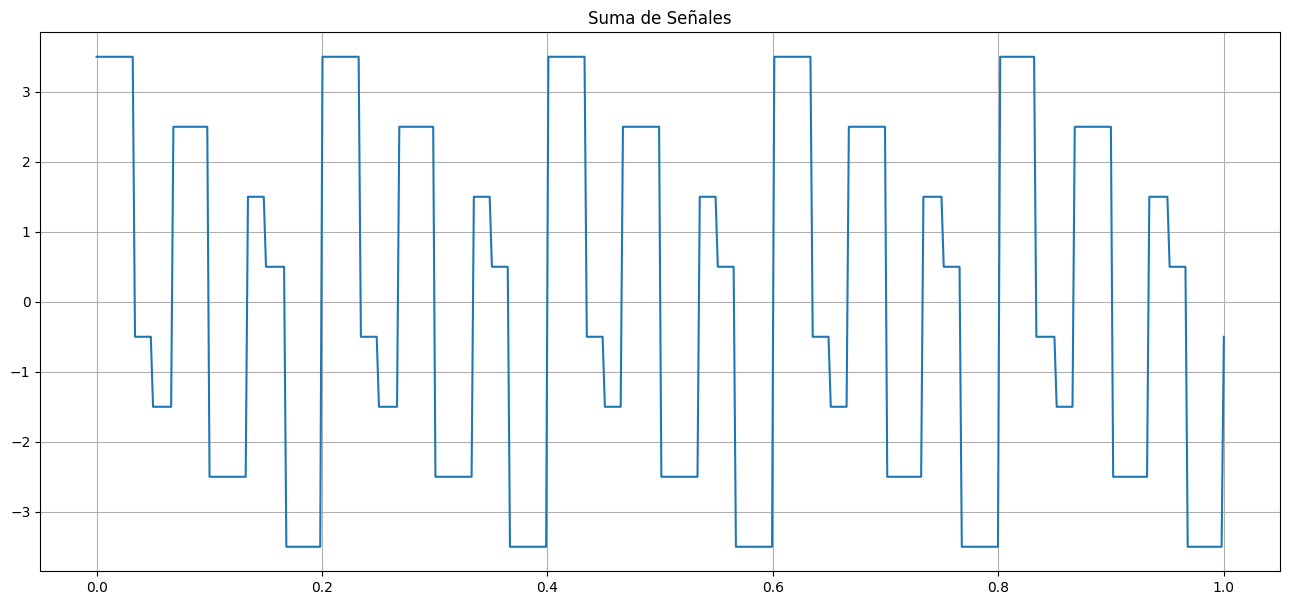

In [11]:
# Suma de las señales
senal_sumada = np.sum(generador.square_wave, axis=0)

vis.plot_signal(senal_sumada, time=generador.time, title="Suma de Señales")

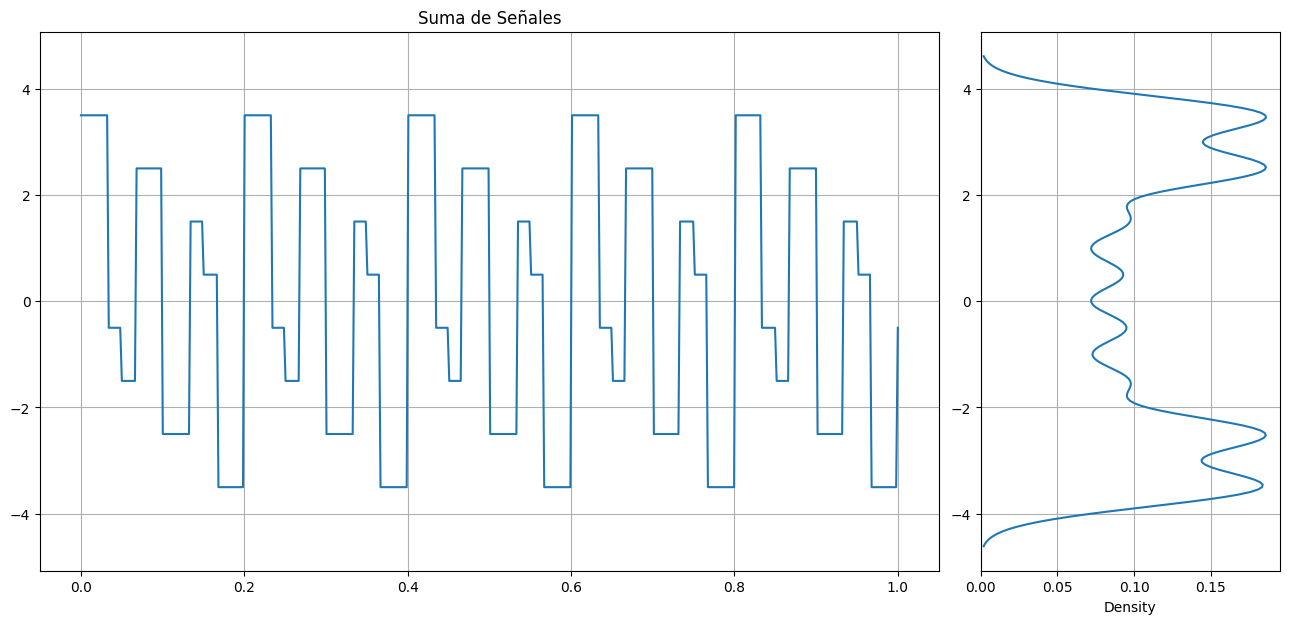

In [12]:
vis.plot_kde(senal_sumada, time=generador.time, title="Suma de Señales")

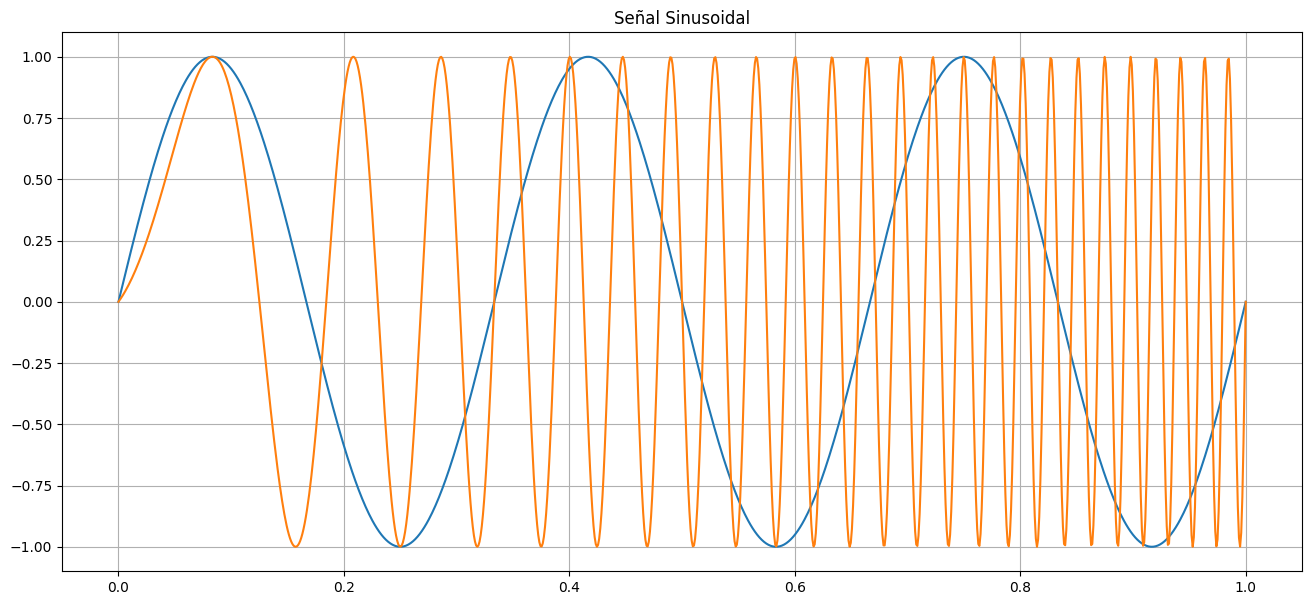

In [13]:
f = [3, [1, 25]]

# Inicialización del generador de señales
generador = SignalGenerator(frequency=f, amplitude=1, duration=1, sampling_rate=1000)

vis = Visualizer(figsize=(16, 7), dpi=100)

# Generación de la señal sinusoidal
senal_seno = generador.sine_wave

# Visualización usando plot_signal de dsp-utils
vis.plot_signal(senal_seno, time=generador.time, title="Señal Sinusoidal")

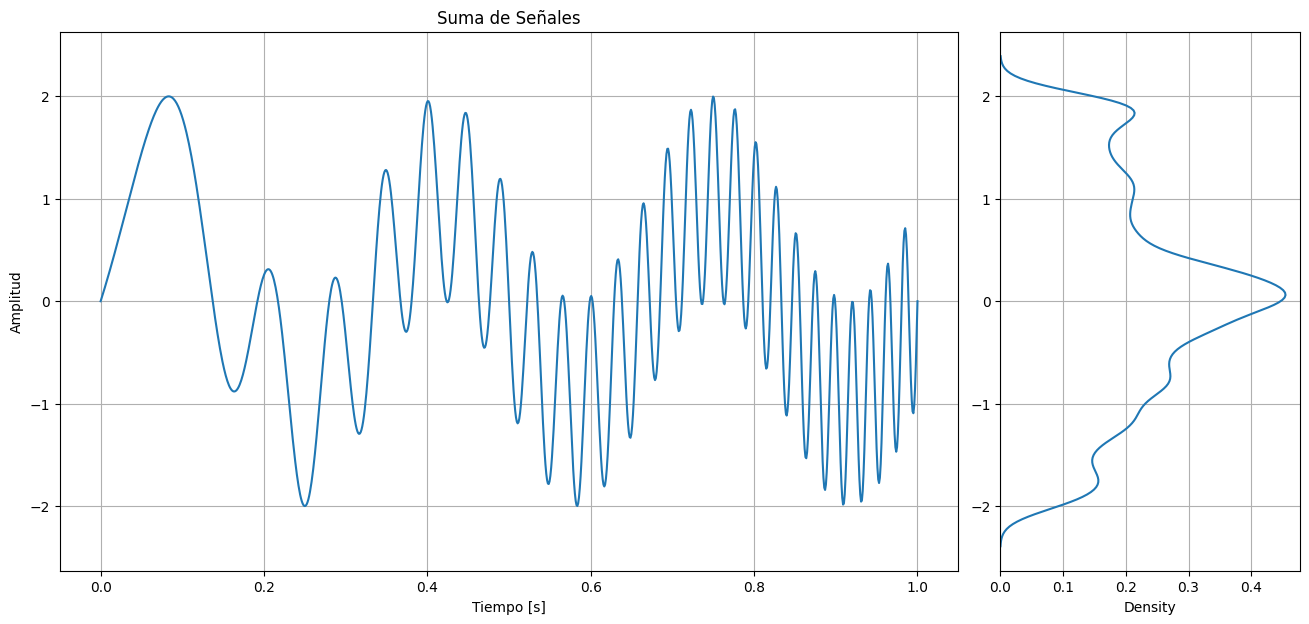

In [14]:
# Suma de las señales
senal_sumada = np.sum(generador.sine_wave, axis=0)

vis.plot_kde(senal_sumada, time=generador.time, title="Suma de Señales", xlabel='Tiempo [s]', ylabel="Amplitud")

## 6. Relación Señal-Ruido (Signal-to-Noise Ratio, SNR)

La **Relación Señal-Ruido** (SNR, por sus siglas en inglés) es una medida que compara el nivel de potencia de una señal deseada con el nivel de potencia del ruido que la acompaña. Se utiliza comúnmente en procesamiento de señales, comunicaciones y acústica para evaluar la calidad de una señal.

La fórmula general para calcular el SNR es:

$
\text{SNR} = \frac{P_{\text{señal}}}{P_{\text{ruido}}}
$

Donde:
- $P_{\text{señal}}$: Potencia promedio de la señal.
- $P_{\text{ruido}}$: Potencia promedio del ruido.

El **SNR en decibeles (dB)** se expresa como:

$
\text{SNR(dB)} = 10 \cdot \log_{10}\left(\frac{P_{\text{señal}}}{P_{\text{ruido}}}\right)
$

### Potencia de la señal

La potencia promedio de una señal en el dominio discreto, con \(N\) muestras, se calcula como:

$
P_{\text{señal}} = \frac{1}{N} \sum_{i=1}^N x[i]^2
$

Donde:
- $x[i]$: Amplitud de la señal en la muestra \(i\).
- $N$: Número total de muestras de la señal.

### Potencia del ruido

De forma similar, la potencia promedio del ruido se calcula como:

$
P_{\text{ruido}} = \frac{1}{N} \sum_{i=1}^N n[i]^2
$

Donde:
- $n[i]$: Amplitud del ruido en la muestra $i$.
- $N$: Número total de muestras del ruido.

### Interpretación del SNR

- Un **SNR alto** (por ejemplo, 30 dB o más) indica que la señal es mucho más fuerte que el ruido, lo que implica buena calidad.
- Un **SNR bajo** (por ejemplo, 0 dB o menos) significa que el ruido es comparable o mayor que la señal, lo que puede dificultar la detección o interpretación de la señal.


In [14]:
from ipywidgets import interact

frequencies = [5, 10, 15]      
amplitudes = [1, 0.5, 2]        
duration = 1                  
sampling_rate = 500             

generador = SignalGenerator(frequency=frequencies, amplitude=amplitudes, duration=duration, sampling_rate=sampling_rate)

senal_sumada = np.sum(generador.sine_wave, axis=0)

@interact(db=(0, 90, 1))
def _(db=30):
    noise = generador.gaussian_noise_db(senal_sumada, db=db)
    vis.plot_signal(senal_sumada + noise, time=generador.time, title="Suma de Señales", xlabel='Tiempo [s]', ylabel="Amplitud")

interactive(children=(IntSlider(value=30, description='db', max=90, min=-90), Output()), _dom_classes=('widget…